In [17]:
import pandas as pd
df= pd.read_csv("../data/final_processed_real_estate_data.csv")

In [18]:
print(df[" Number of rooms"].unique()) #checking for unique values in the column

[2 3 1 0 4 5]


In [19]:
room_map = { 
    "One" : 1, 
    "Two": 2, 
    "Three": 3, 
    "Four": 4, 
    "Multi": 5,
    "Unknown": 0
}

In [7]:
def extract_room_count(text):
    if pd.isna(text):
        return None
    for word, num in room_map.items():
        if word in text:
            return num
    return None  # if no match found

df[" Number of rooms"] = df[" Number of rooms"].apply(extract_room_count)


TypeError: argument of type 'int' is not iterable

In [20]:
bins = [ 0, 5, 7, 9, 11, 15, 20, 35]
labels = ['<5', '5-7', '7-9', '9-11', '11-15', '15-20', '20+']


In [21]:
df[' Kitchen Area'] = pd.cut(df[' Kitchen area, m2'], bins=bins, labels=labels, include_lowest=True)


In [22]:
df.to_csv("../data/final_processed_real_estate_data.csv",index=False)  

In [23]:

for col in [' Price, RUR', ' Total area, m2', ' Living area, m2', ' Kitchen area, m2', ' Number of rooms']:
    print(col, "→", df[col].min(), "-", df[col].max())

 Price, RUR → 275000.0 - 15250452.0
 Total area, m2 → 4.0 - 322.0
 Living area, m2 → 0.0 - 120.0
 Kitchen area, m2 → 0.0 - 35.0
 Number of rooms → 0 - 5


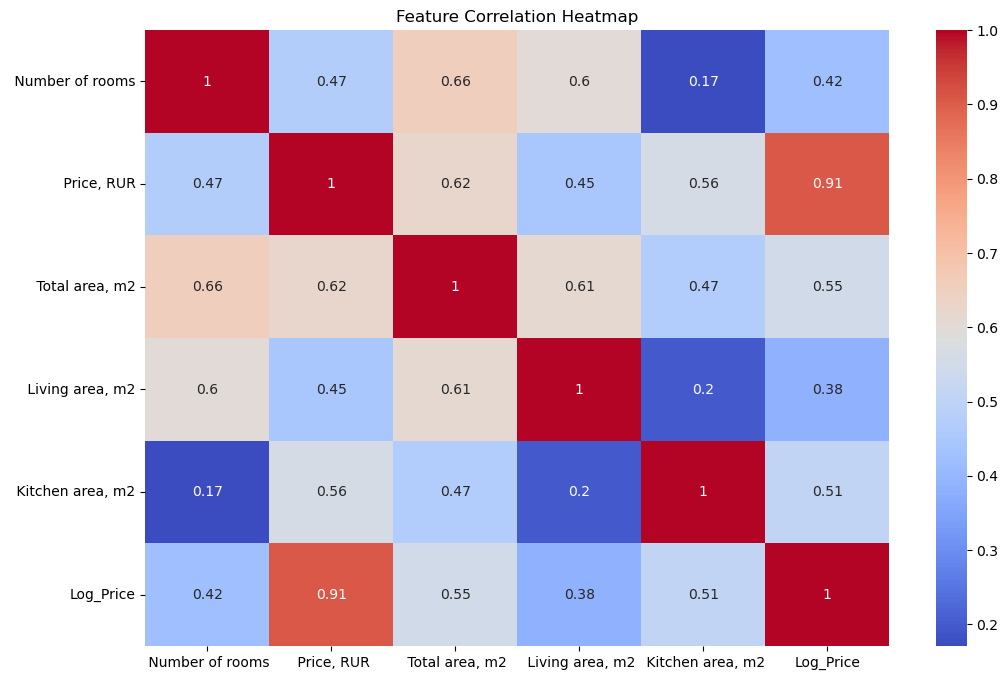

In [26]:
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

df['Log_Price'] = np.log(df[' Price, RUR']) #log-transforming the Price column to tackle outliers 

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

### Key Insights: `Number of rooms` vs. `Log_Price`

- **Correlation Coefficient: 0.42** – Indicates a **moderate positive** relationship.  
  - This suggests that, in general, listings with more rooms tend to have higher log-transformed prices, though the relationship isn't very strong.

- Compared to `Price, RUR` (0.47), the correlation with `Log_Price` (0.42) is **slightly weaker**, as the log transformation **compresses large price values**, reducing the relative impact of number of rooms on very expensive properties.

- This implies that while **room count is a useful predictor**, it's not sufficient alone — especially after log transformation, which reduces price variance.

---

### 📌 Summary:
`Number of rooms` shows a consistent, moderate correlation with both actual and log-transformed prices. However, the slightly lower correlation with `Log_Price` highlights that room count may have diminishing influence on extremely high-priced listings. Additional features (e.g., total area, location) will be necessary to fully explain pricing.


In [27]:
df.to_csv('../data/final01_processed_real_estate_data.csv',index=False) # Saving the final dataset 